Epoch 1/20
9/9 [==============================] - 0s 23ms/step - loss: 1.2069 - accuracy: 0.2667 - val_loss: 1.0458 - val_accuracy: 0.4000
Epoch 2/20
9/9 [==============================] - 0s 16ms/step - loss: 0.9270 - accuracy: 0.6000 - val_loss: 0.9225 - val_accuracy: 0.6000
Epoch 3/20
9/9 [==============================] - 0s 14ms/step - loss: 0.6527 - accuracy: 0.8000 - val_loss: 0.9489 - val_accuracy: 0.6000
Epoch 4/20
9/9 [==============================] - 0s 17ms/step - loss: 0.4171 - accuracy: 0.9111 - val_loss: 1.0053 - val_accuracy: 0.4667
Epoch 5/20
9/9 [==============================] - 0s 17ms/step - loss: 0.1859 - accuracy: 0.9778 - val_loss: 1.7098 - val_accuracy: 0.6000
Epoch 6/20
9/9 [==============================] - 0s 15ms/step - loss: 0.0880 - accuracy: 1.0000 - val_loss: 1.6317 - val_accuracy: 0.6000
Epoch 7/20
9/9 [==============================] - 0s 14ms/step - loss: 0.0387 - accuracy: 1.0000 - val_loss: 2.1586 - val_accuracy: 0.5333
Epoch 8/20
9/9 [===========

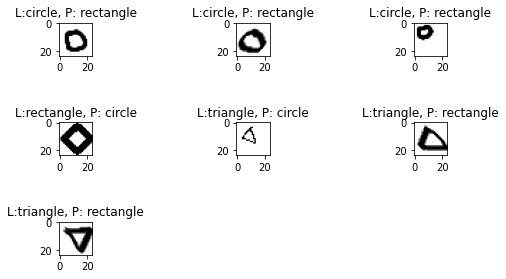

In [8]:
import numpy as np
EPOCHS = 20
PATH = 'C:/Projects/keras_talk/keras/intern/0708/handwriting_shape2_array/'
np.random.seed(3)

x_train = np.load(PATH+'x_train.npy')
y_train = np.load(PATH+'y_train.npy')
x_test = np.load(PATH+'x_test.npy')
y_test = np.load(PATH+'y_test.npy')

import tensorflow as tf
import tensorflow.keras.utils
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

x_train = x_train.reshape(x_train.shape[0], 24,24,1)
x_test = x_test.reshape(x_test.shape[0], 24,24,1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

y_train = tf.keras.utils.to_categorical(y_train, 3)
y_test = tf.keras.utils.to_categorical(y_test,3)




model = tf.keras.Sequential()

Conv1 = Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(24,24,1))
Conv2 = Conv2D(64, kernel_size=(3,3), activation='relu')
MP = MaxPooling2D(pool_size=(2,2))
F = Flatten()
L1 = Dense(128, activation='relu')
L2 = Dense(3, activation='softmax')

Layers = [Conv1, Conv2, MP, F, L1, L2]
for layer in Layers:
    model.add(layer)
    

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=EPOCHS, 
                 validation_data = (x_test, y_test), batch_size =5)


scores = model.evaluate(x_test,y_test, steps=5)

print("{}: {:0.2f}%".format(model.metrics_names[1], scores[1]*100))




#
import matplotlib.pyplot as plt
%matplotlib inline
predicted_res = model.predict(x_test)
predicted_labels = np.argmax(predicted_res, axis=1)
test_labels = np.argmax(y_test, axis=1)

wrong_result = []

for n in range(len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)
        
plt.figure(figsize = (2,3))
count = 0
shape_dict = {0:'circle', 1:'rectangle', 2:'triangle'}


for n in wrong_result:
    count += 1
    plt.subplot(3,3,count)
    plt.imshow(1-x_test[n].reshape(24,24), cmap='Greys')
    tmp = "L:" + shape_dict[test_labels[n]] + ", P: " + shape_dict[predicted_labels[n]]
    plt.title(tmp)




plt.subplots_adjust(right = 3, top = 1.2, wspace = 2, hspace = 2)
plt.savefig('HwSR2.png' , bbox_inches='tight')
plt.show()
